# Analyzing COVID-19 data

The notebook below has been created in a hurry, no guarantee at all. Doublecheck all computations etc. before 

The data is dynamically imported from https://raw.githubusercontent.com/CSSEGISandData

Read their terms of use! Last time I checked it, it is strictly for public use in academic or research purposes.

## Import data

In [47]:
import pandas as pd
import numpy as np

raw_types = [ "Confirmed", "Recovered", "Deaths" ]
# raw_types = [ "Confirmed", "Deaths" ]

raw_urls = {}
raw_urls["Confirmed"] = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
raw_urls["Recovered"] = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
raw_urls["Deaths"] = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

raw_df = {}
for raw_type in raw_types:
    raw_df[raw_type] = pd.read_csv(raw_urls[raw_type])
    

Let's have a look which province/states and countries/regions are included. Only a part of the list is shown.

In [48]:
raw_df[raw_types[0]][~pd.notnull(raw_df[raw_types[0]]['Province/State'])]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,1,1,1,3,3,3,7,7,7,7
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,128,158,266,301,387,387,502,589,690,745
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,136,160,194,235,249,265,290,329,407,424
16,NaN,Austria,47.516200,14.550100,0,0,0,0,0,0,...,2388,2814,3582,4474,5283,5588,6909,7657,8271,8788
17,NaN,Azerbaijan,40.143100,47.576900,0,0,0,0,0,0,...,44,53,65,72,87,93,122,165,182,209


# Adaptation

Via the following list you can adapt which countries to be analyzed. 

In [49]:
countries = [ 'Germany', 'France', 'Sweden', 'Italy', 'India', 'Spain', 'US', 'United Kingdom' ]

Check that all countries have accociated data.

In [50]:
remove_states = raw_df[raw_types[0]][~pd.notnull(raw_df[raw_types[0]]['Province/State'])]
for country in countries:    
    filtered = remove_states.loc[remove_states['Country/Region'].eq(country)]
    if (filtered.empty):
        raise ValueError("Country "+country+" not found in input data.")           

Special treatment of specific countries which are decomposed into provinces/states.

In [51]:
raw_df[raw_types[0]]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,1,1,1,3,3,3,7,7,7,7
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,128,158,266,301,387,387,502,589,690,745
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,136,160,194,235,249,265,290,329,407,424
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,6,9,19,32,39,39,53,62,71,77
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,353,436,669,669,818,1029,1219,1405,1617,1791


## Convert Data

In [52]:
def extract_values(df, country):
    filtered = df[~pd.notnull(df['Province/State']) & df['Country/Region'].eq(country)]
    transposed = filtered.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).transpose()
    values = transposed[transposed.columns[0]]
    return values

dates = raw_df[raw_types[0]].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).transpose().index.tolist()

# Get data for countries
all = {}
for country in countries:
    data = {}
    for raw_type in raw_types:
        values = extract_values(raw_df[raw_type], country)
        data[raw_type] = values
    all[country] = pd.DataFrame(data, index=dates)

Show intermediate data.

## Enrich data

Enrich by computing Active = Confirmed - (Recovered + Deaths)

In [53]:
for country in ext_countries:
    # Underlying data sets doesn't support RECOVERED anymore
    all[country]["Active"] = all[country]["Confirmed"] - (all[country]["Recovered"] + all[country]["Deaths"])    
    #all[country]["Active"] = all[country]["Confirmed"] - (all[country]["Deaths"])

raw_types_ext = raw_types.copy()
raw_types_ext.append("Active")

Enrich by computing the rate and moving average on rate.

In [54]:
window_size = 7

def addRate(df, label):
    df[label+" Rate"] = df[label].pct_change().replace(np.inf,0)
    
def addMovAverage(df, label, window_size):
    df[label+" Avg"] = df[label].rolling(window=window_size,center=False).mean()    
    #df[label+" Avg"] = df[label].ewm(com=0.1).mean()   

def addInterpolate(df, label):
    df[label+" Avg"] = df[label].interpolate(method='linear', axis=0)
                       
for country in ext_countries:
    for raw_type in raw_types_ext:
        addRate(all[country], raw_type)
        addMovAverage(all[country], raw_type+" Rate", window_size)
        #addInterpolate(all[country], raw_type+" Rate")

# Prediction

In [55]:
preview = 7

def predict(input_df, dimension):
    for raw_type in raw_types_ext:
        rate = input_df[dimension + " Rate Avg"]
        #diff = all[country]["Deaths Rate Avg"] - all[country]["Deaths Rate Avg"].shift(1)
        predict = input_df[dimension]
        for outlook in range(1,preview):
            predict = predict * (1+rate*0.9)
        input_df[dimension+" Predict"] = predict

for country in ext_countries:
    predict(all[country], "Confirmed")
    predict(all[country], "Deaths")


Show part of final data.

In [56]:
all["US"].tail(15)

,Confirmed,Recovered,Deaths,Active,Confirmed Rate,Confirmed Rate Avg,Recovered Rate,Recovered Rate Avg,Deaths Rate,Deaths Rate Avg,Active Rate,Active Rate Avg,Confirmed Predict,Deaths Predict
3/15/20,3499,12,63,3424,0.283095,0.321323,0.000000,0.091837,0.166667,0.172539,0.286734,0.328156,16063.765470,149.787659
3/16/20,4632,17,85,4530,0.323807,0.349655,0.416667,0.151361,0.349206,0.215623,0.323014,0.355642,23917.081445,246.364197
3/17/20,6421,17,108,6296,0.386226,0.312696,0.000000,0.130952,0.270588,0.215318,0.389845,0.316182,28429.221257,312.595116
3/18/20,7783,105,118,7560,0.212116,0.295032,5.176471,0.870448,0.092593,0.187729,0.200762,0.296263,31972.677849,301.072216
3/19/20,13677,121,200,13356,0.757292,0.360616,0.152381,0.820788,0.694915,0.271129,0.766667,0.362595,73859.980116,741.287390
3/20/20,19100,147,244,18709,0.396505,0.372933,0.214876,0.851485,0.220000,0.277558,0.400794,0.374715,108435.053135,929.902337
3/21/20,25489,176,307,25006,0.334503,0.384792,0.197279,0.879668,0.258197,0.293167,0.336576,0.386342,151784.905802,1251.155667
3/22/20,33276,178,417,32681,0.305504,0.387993,0.011364,0.881291,0.358306,0.320544,0.306926,0.389226,200713.908596,1908.186719
3/23/20,43847,178,557,43112,0.317676,0.387118,0.000000,0.821767,0.335731,0.318619,0.319176,0.388678,263550.298764,2528.331175
3/24/20,53740,348,706,52686,0.225625,0.364175,0.955056,0.958204,0.267504,0.318178,0.222073,0.364711,294448.582564,3198.751041


## Plot data

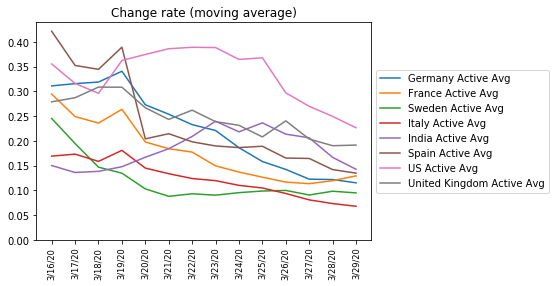

In [57]:
import matplotlib.pyplot as plt

number_of_days = 14

for country in ext_countries:
    ts = all[country]["Active Rate Avg"].tail(number_of_days)
    pl = ts.plot(label=country+" Active Avg")
    
    # Uncomment the following to add all lines in one figure
    #cl = plt.gca().lines[-1].get_color()    
    #ts = all[country]["Deaths Rate Avg"].tail(number_of_days)
    #ts.plot(label=country+" Deaths", linestyle='dashed', color=cl)

plt.title("Change rate (moving average)")
plt.xticks(np.arange(number_of_days), all[country].tail(number_of_days).index.tolist(), 
           fontsize='small', rotation='vertical')
    
# Set maximum y-value 
axes = plt.gca()
axes.set_ylim([0,min(axes.get_ylim()[1],1.0)])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


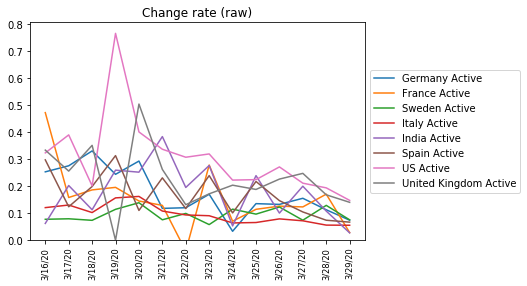

In [58]:
import matplotlib.pyplot as plt

number_of_days = 14

for country in ext_countries:
    ts = all[country]["Active Rate"].tail(number_of_days)
    pl = ts.plot(label=country+" Active")
    
    # Uncomment the following to add all lines in one figure
    #cl = plt.gca().lines[-1].get_color()    
    #ts = all[country]["Deaths Rate Avg"].tail(number_of_days)
    #ts.plot(label=country+" Deaths", linestyle='dashed', color=cl)

plt.title("Change rate (raw)")
plt.xticks(np.arange(number_of_days), all[country].tail(number_of_days).index.tolist(), 
           fontsize='small', rotation='vertical')
    
# Set maximum y-value 
axes = plt.gca()
axes.set_ylim([0,min(axes.get_ylim()[1],1.0)])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

The y-axis shows the daily growth in percentage, e.g. 0.4 means that 40% more cases have been reported.

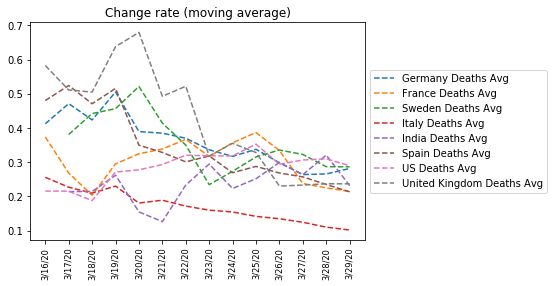

In [59]:
for country in ext_countries:
    ts = all[country]["Deaths Rate Avg"].tail(number_of_days)
    ts.plot(label=country+" Deaths Avg", linestyle='dashed')
        
plt.title("Change rate (moving average)")
plt.xticks(np.arange(number_of_days), all[country].tail(number_of_days).index.tolist(), 
           fontsize='small', rotation='vertical')
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

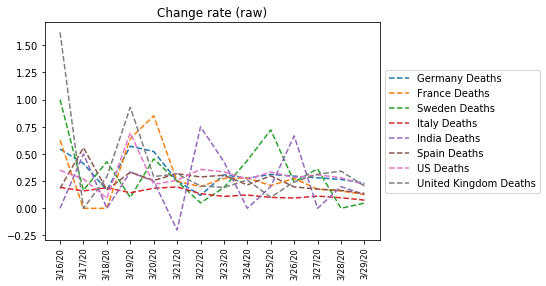

In [60]:
for country in ext_countries:
    ts = all[country]["Deaths Rate"].tail(number_of_days)
    ts.plot(label=country+" Deaths", linestyle='dashed')
       
plt.title("Change rate (raw)")
plt.xticks(np.arange(number_of_days), all[country].tail(number_of_days).index.tolist(), 
           fontsize='small', rotation='vertical')
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Diagram per Country

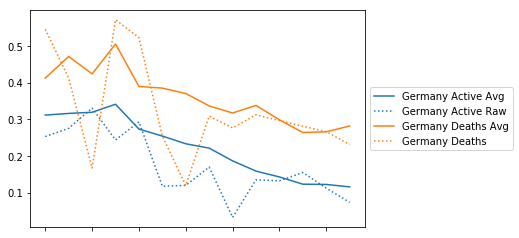

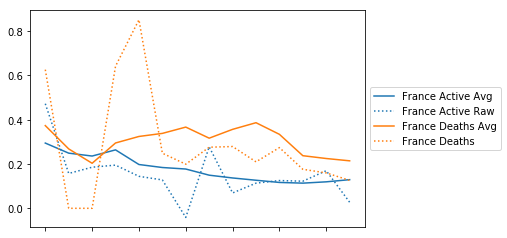

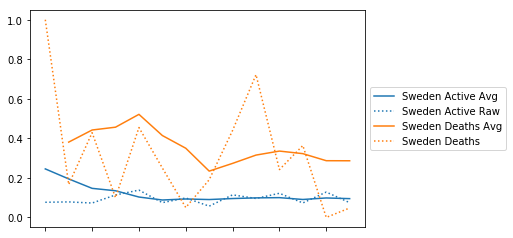

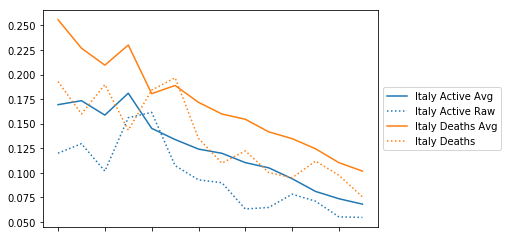

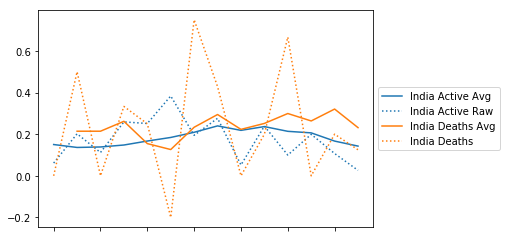

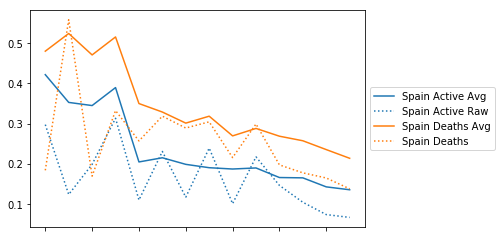

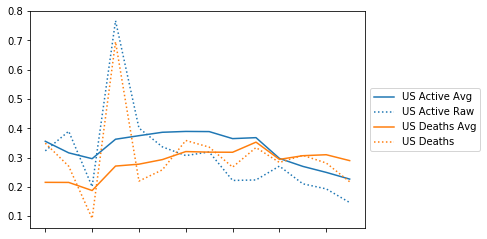

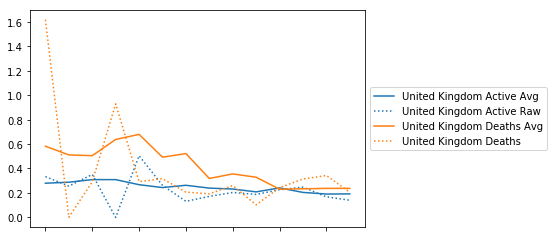

In [61]:
for country in ext_countries:
    ts = all[country]["Active Rate Avg"].tail(number_of_days)
    pl = ts.plot(label=country+" Active Avg")
    
    # Get color of last plot
    cl = plt.gca().lines[-1].get_color()
    
    ts = all[country]["Active Rate"].tail(number_of_days)
    ts.plot(label=country+" Active Raw", linestyle='dotted', color=cl)

    ts = all[country]["Deaths Rate Avg"].tail(number_of_days)
    pl = ts.plot(label=country+" Deaths Avg")
    
    cl = plt.gca().lines[-1].get_color()
    
    ts = all[country]["Deaths Rate"].tail(number_of_days)
    ts.plot(label=country+" Deaths", linestyle='dotted', color=cl)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.show()

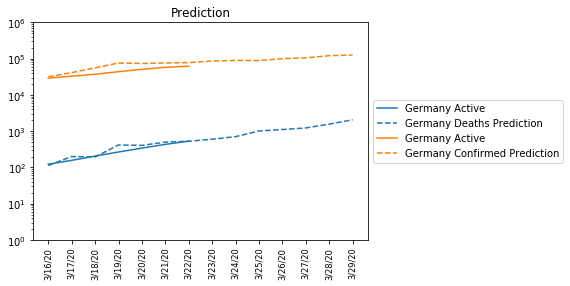

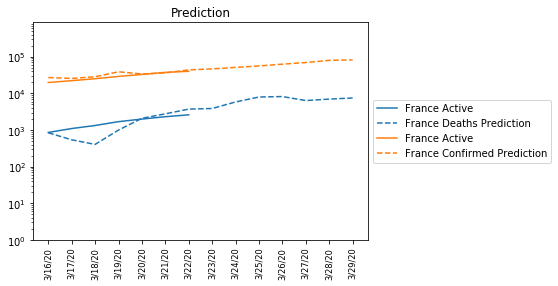

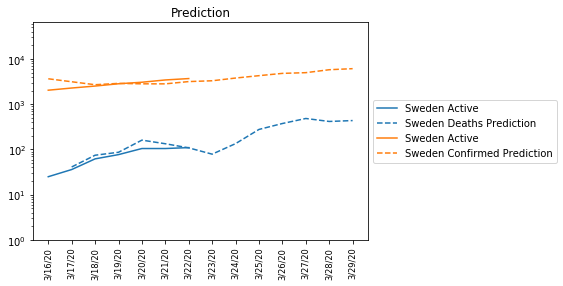

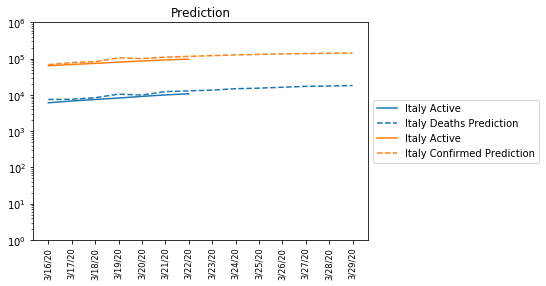

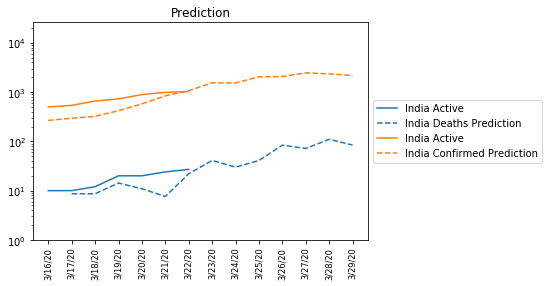

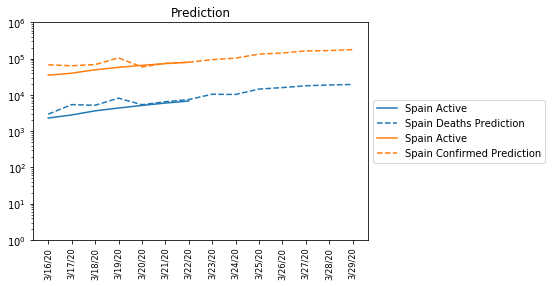

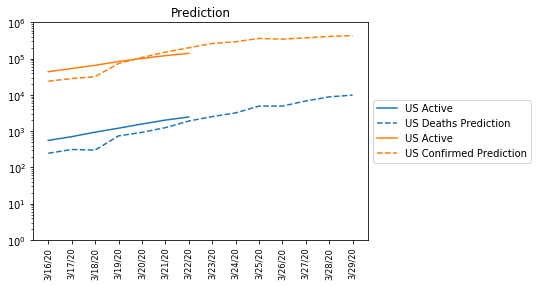

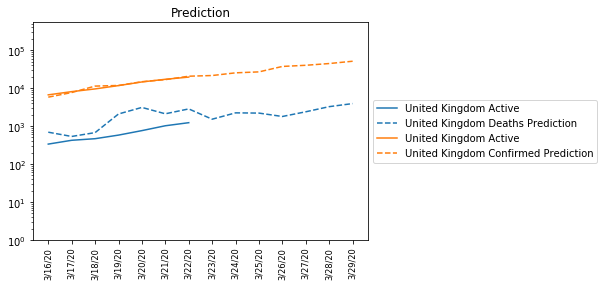

In [62]:
for country in ext_countries:
    ts = all[country]["Deaths"].shift(-preview).tail(number_of_days)
    pl = ts.plot(label=country+" Active")
    
    # Get color of last plot
    cl = plt.gca().lines[-1].get_color()
    
    ts = all[country]["Deaths Predict"].tail(number_of_days)
    ts.plot(label=country+" Deaths Prediction", linestyle='dashed', color=cl)

    ts = all[country]["Confirmed"].shift(-preview).tail(number_of_days)
    pl = ts.plot(label=country+" Active")
    
    # Get color of last plot
    cl = plt.gca().lines[-1].get_color()
    
    ts = all[country]["Confirmed Predict"].tail(number_of_days)
    
    ts.plot(label=country+" Confirmed Prediction", linestyle='dashed', color=cl)

    plt.title("Prediction")
    plt.xticks(np.arange(number_of_days), all[country].tail(number_of_days).index.tolist(), 
               fontsize='small', rotation='vertical')

    # Set maximum y-value 
    axes = plt.gca()
    axes.set_ylim([0,min(axes.get_ylim()[1],100000)])
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    axes = plt.gca()
    axes.set_ylim([1,min(max(10,10*axes.get_ylim()[1]),1000000)])
    axes.set_yscale("log")
    
    plt.show()

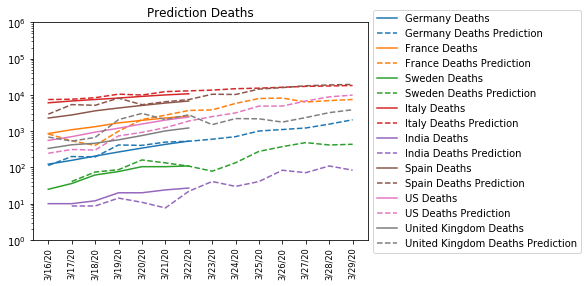

In [63]:
for country in ext_countries:
    ts = all[country]["Deaths"].shift(-preview).tail(number_of_days)
    pl = ts.plot(label=country+" Deaths")
    
    # Get color of last plot
    cl = plt.gca().lines[-1].get_color()
    
    ts = all[country]["Deaths Predict"].tail(number_of_days)
    
    axes = plt.gca()
    axes.set_ylim([1,min(10*axes.get_ylim()[1],1000000)])
    axes.set_yscale("log")
    
    ts.plot(label=country+" Deaths Prediction", linestyle='dashed', color=cl)

    plt.title("Prediction Deaths")
    plt.xticks(np.arange(number_of_days), all[country].tail(number_of_days).index.tolist(), 
               fontsize='small', rotation='vertical')

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
plt.show()

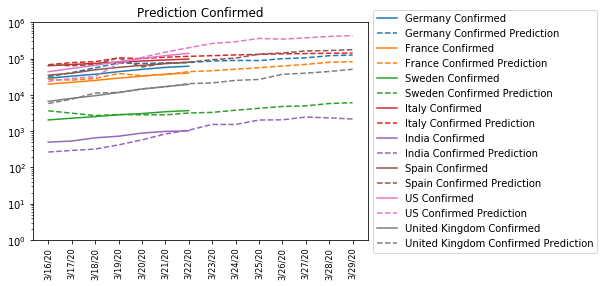

In [64]:
for country in ext_countries:
    ts = all[country]["Confirmed"].shift(-preview).tail(number_of_days)
    pl = ts.plot(label=country+" Confirmed")
    
    # Get color of last plot
    cl = plt.gca().lines[-1].get_color()
    
    ts = all[country]["Confirmed Predict"].tail(number_of_days)
    ts.plot(label=country+" Confirmed Prediction", linestyle='dashed', color=cl)

    plt.title("Prediction Confirmed")
    plt.xticks(np.arange(number_of_days), all[country].tail(number_of_days).index.tolist(), 
               fontsize='small', rotation='vertical')

    # Set maximum y-value 
    axes = plt.gca()
    axes.set_ylim([1,min(10*axes.get_ylim()[1],1000000)])
    axes.set_yscale("log")
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()